# 225229147

# Lab 6 Multi-class Classification of Fashion Apparels using DNN

In [1]:
import tensorflow as tf #importing necessary modules
import pandas as pd
import numpy as np
import keras

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data() #loading the inbuild dataset

In [3]:
#EDA
print("X_train Size:",X_train.size)
print("X_test Size:",X_test.size)
print("y_train Size:",y_train.size)
print("y_test Size:",y_test.size)

X_train Size: 47040000
X_test Size: 7840000
y_train Size: 60000
y_test Size: 10000


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

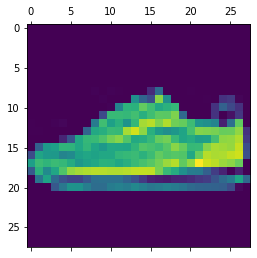

In [8]:
import matplotlib.pyplot as plt #showing a sample image
plt.matshow(X_train[52])
plt.show()

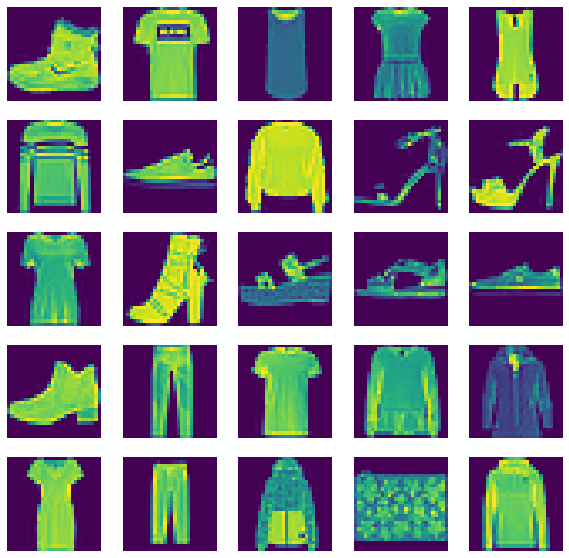

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.axis('off')
plt.show()

In [10]:
X_train=X_train/255.0 #Normalization
X_test=X_test/255.0

In [11]:
from keras.models import Sequential #Creating and building the model
from keras.layers import Dense,Flatten
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [13]:
model.fit(X_train,y_train,epochs=10) #Fitting the training data

Epoch 1/10
1875/1875 [==============================] - 33s 12ms/step - loss: 0.4747 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3587 - accuracy: 0.8696
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3220 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3002 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2796 - accuracy: 0.8958
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2647 - accuracy: 0.9015
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2520 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2401 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2302 - accuracy: 0.9137
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [14]:
model.evaluate(X_test,y_test) #Evaluation

313/313 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.8850


[0.3364088237285614, 0.8849999904632568]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
import time 

In [17]:
num_parameters_list = [] #List for storing various models value
training_accuracy_list = []
testing_accuracy_list = []
running_time_list = []

In [ ]:
# Function to build and train the model
def build_train_model(nodes, num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        start_time = time.time()
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
        training_time = time.time() - start_time
        _, test_accuracy = model.evaluate(X_test, y_test)
    return model.count_params(), model.evaluate(X_train, y_train)[1], test_accuracy, training_time
# Configurations to run
configurations = [
(128, 2),
(256, 2),
(512, 2),
(128, 3),
(256, 3),
(512, 3),
(256, 4),
(512, 4),
(128, 4),
(128, 5),
(256, 5),
(512, 5)
]

for nodes, num_layers in configurations:
    num_params, train_acc, test_acc, runtime = build_train_model(nodes, num_layers)
    num_parameters_list.append(num_params)
    training_accuracy_list.append(train_acc)
    testing_accuracy_list.append(test_acc)
    running_time_list.append(runtime)


313/313 [==============================] - 1s 2ms/step - loss: 0.4578 - accuracy: 0.8754


Best Configuration:
Nodes: 256, Number of Layers: 5
Testing Accuracy: 0.8968999981880188


<Figure size 864x432 with 0 Axes>

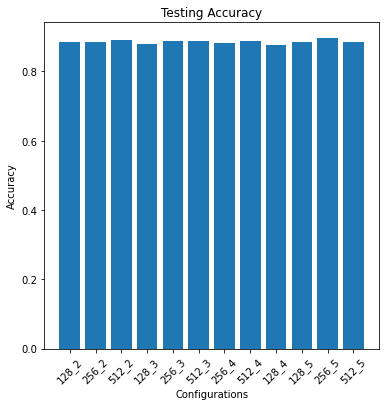

In [25]:
x_labels = [f"{nodes}_{num_layers}" for nodes, num_layers in configurations]
plt.figure(figsize=(12, 6))
# Find the index of the maximum testing accuracy
best_config_index = np.argmax(testing_accuracy_list)
# Get the best configuration parameters
best_nodes, best_num_layers = configurations[best_config_index]
print("Best Configuration:")
print(f"Nodes: {best_nodes}, Number of Layers: {best_num_layers}")
print(f"Testing Accuracy: {testing_accuracy_list[best_config_index]}")
# Plotting the results for the best configuration
plt.figure(figsize=(6, 6))
plt.bar(x_labels, testing_accuracy_list)
plt.xticks(rotation=45)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Configurations')
plt.show()

In [26]:
import pandas as pd
results_df = pd.DataFrame({
    'Configuration': x_labels,
    'Parameters Learned': num_parameters_list,
    'Training Accuracy': training_accuracy_list,
    'Testing Accuracy': testing_accuracy_list,
    'Running Time (s)': running_time_list
})
print(results_df)
best_config_index = np.argmax(testing_accuracy_list)
best_config = results_df.iloc[best_config_index]
print("\nBest Configuration:")
print(best_config)

   Configuration  Parameters Learned  Training Accuracy  Testing Accuracy  \
0          128_2              104468           0.931300            0.8844   
1          256_2              208916           0.934783            0.8854   
2          512_2              417812           0.934617            0.8906   
3          128_3              107166           0.929833            0.8801   
4          256_3              214302           0.941650            0.8882   
5          512_3              428574           0.949600            0.8892   
6          256_4              219688           0.941617            0.8822   
7          512_4              439336           0.948217            0.8876   
8          128_4              109864           0.933383            0.8754   
9          128_5              112562           0.944933            0.8856   
10         256_5              225074           0.956750            0.8969   
11         512_5              450098           0.946083            0.8854   

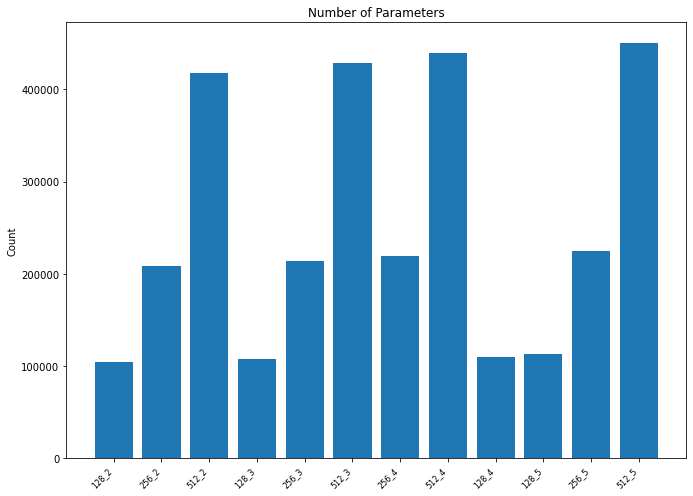

In [27]:
plt.figure(figsize=(36, 7)) # Graph on parameters
plt.subplot(1, 4, 1)
plt.bar(x_labels, num_parameters_list, width=0.8) # Adjust the width value to control the spacing
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate labels for better visibility
plt.title('Number of Parameters')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

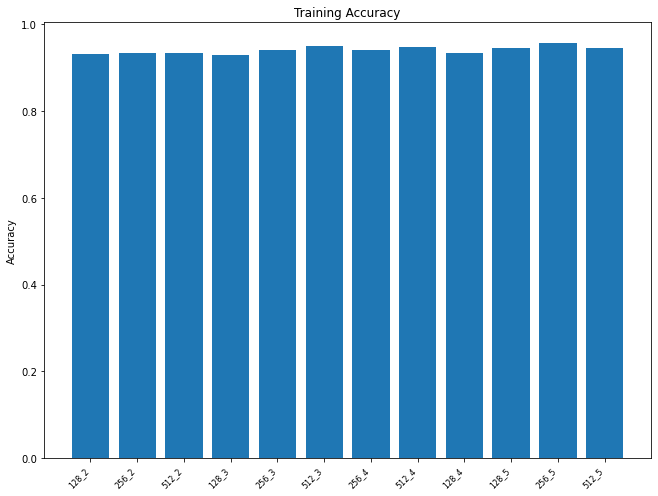

In [28]:
plt.figure(figsize=(36, 7))
# Training Accuracy plot
plt.subplot(1, 4, 2)
plt.bar(x_labels, training_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

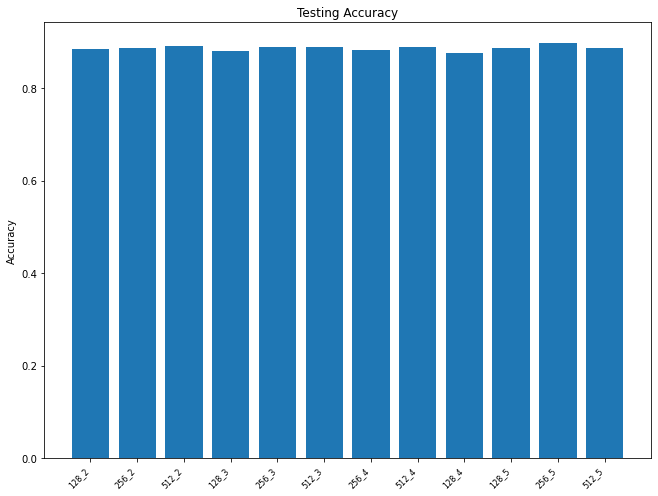

In [29]:
plt.figure(figsize=(36, 7))
# Testing Accuracy plot
plt.subplot(1, 4, 3)
plt.bar(x_labels, testing_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

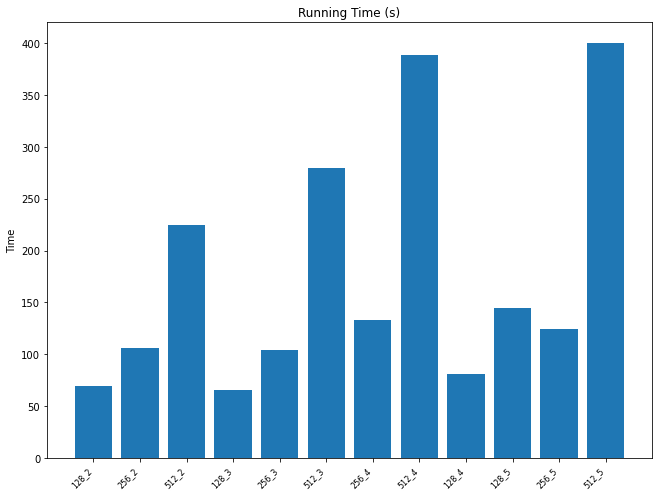

In [30]:
plt.figure(figsize=(36, 7))
# Running Time plot
plt.subplot(1, 4, 4)
plt.bar(x_labels, running_time_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Running Time (s)')
plt.ylabel('Time')
plt.tight_layout()
plt.show()